In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [ ]:
block_size = 3
X, Y = [], []
for w in words:
    print(w)
    context = [0] * block_size
    for ch in w +'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)   
Y = torch.tensor(Y)   

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
C = torch.randn((27, 2))

In [9]:
C.shape

torch.Size([27, 2])

In [10]:
C[5]

tensor([ 1.8754, -0.8751])

In [11]:
X.shape

torch.Size([228146, 3])

In [12]:
X[0]

tensor([0, 0, 0])

In [13]:
C[X[0]]

tensor([[-0.7771, -1.2528],
        [-0.7771, -1.2528],
        [-0.7771, -1.2528]])

In [14]:
C[X].shape

torch.Size([228146, 3, 2])

In [15]:
C[torch.tensor([5, 6, 7, 7, 7, 7, 7])]

tensor([[ 1.8754, -0.8751],
        [-1.1993,  0.1478],
        [-0.7112,  0.9749],
        [-0.7112,  0.9749],
        [-0.7112,  0.9749],
        [-0.7112,  0.9749],
        [-0.7112,  0.9749]])

In [16]:
X.shape

torch.Size([228146, 3])

In [17]:
C = torch.randn((27, 2))

In [18]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [19]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [20]:
emb.shape

torch.Size([228146, 3, 2])

In [21]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape

torch.Size([228146, 6])

In [22]:
W1 = torch.randn((6, 100)) 
b1 = torch.randn(100)

In [23]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)


In [24]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [25]:
logits = h @ W2 + b2

In [26]:
logits.shape

torch.Size([228146, 27])

In [27]:
counts = logits.exp()

In [28]:
prob = counts / counts.sum(1, keepdims = True)
prob.shape

torch.Size([228146, 27])

In [29]:
Y.shape

torch.Size([228146])

In [30]:
prob[Y].shape

torch.Size([228146, 27])

In [31]:
em = C[X]
h = torch.tanh(em.view(-1, 6)@W1 + b1) #(32, 100)
logits = h@W2 +b2 #(32, 27
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(228146), Y].log().mean()
loss

tensor(16.7622)

In [32]:
prob.shape

torch.Size([228146, 27])

In [33]:
prob[0, Y[0]]

tensor(6.9373e-09)

In [34]:
F.cross_entropy(logits, Y)

tensor(16.7622)

In [35]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 64), generator=g)
W1 = torch.randn((3*64, 64), generator=g)
b1 = torch.randn(64, generator=g)
W2 = torch.randn((64, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

#This is a 3 layers model; I didn't use it because I am not sure I am allowed to use 3 layers here.
# g = torch.Generator().manual_seed(2147483647)
# C = torch.randn((27, 64), generator=g)
# W1 = torch.randn((3*64, 128), generator=g)
# b1 = torch.randn(128, generator=g)
# W2 = torch.randn((128, 64), generator=g)
# b2 = torch.randn(64, generator=g)
# W3 = torch.randn((64, 27), generator=g)
# b3 = torch.randn(27, generator=g)
# parameters = [C, W1, b1, W2, b2]

In [36]:
sum(p.nelement() for p in parameters)

15835

In [37]:
for p in parameters:
    p.requires_grad = True

In [38]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

In [39]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:

        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] +[ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words) 
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [40]:
10**-0.1

0.7943282347242815

In [41]:
#becareful that in production does not run the randint to get the training index for performance reason.
lri = []
lossi = []
lossi_dev = []
stepi = []
for i in range(200000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass

    emb = C[Xtr[ix]] 
    h = torch.tanh(emb.view(-1, 3*64) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    



    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    # lr = lrs[i]
    lr = 10**-1
    if(i>=150000): lr = 10**-2
    for p in parameters:
        p.data += -lr * p.grad

    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

    # dev forward part
    with torch.no_grad():
        ix_dev = torch.randint(0, Xdev.shape[0], (32,))
        emb_dev = C[Xdev[ix_dev]] # (32, 3, 2)
        h_dev = torch.tanh(emb_dev.view(-1, 3*64) @ W1 + b1) # (32, 100)
        logits_dev = h_dev @ W2 + b2 # (32, 27)
        loss_dev = F.cross_entropy(logits_dev, Ydev[ix_dev])
        lossi_dev.append(loss_dev.item())

print(lossi[-1], lossi_dev[-1])

2.05654239654541 2.2784230709075928


In [42]:
emb.shape

torch.Size([32, 3, 64])

In [43]:
with torch.no_grad():
    emb = C[Xtr]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1402)

In [44]:
with torch.no_grad():
    emb = C[Xdev]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1766)

In [45]:
# plt.plot(lri, lossi)

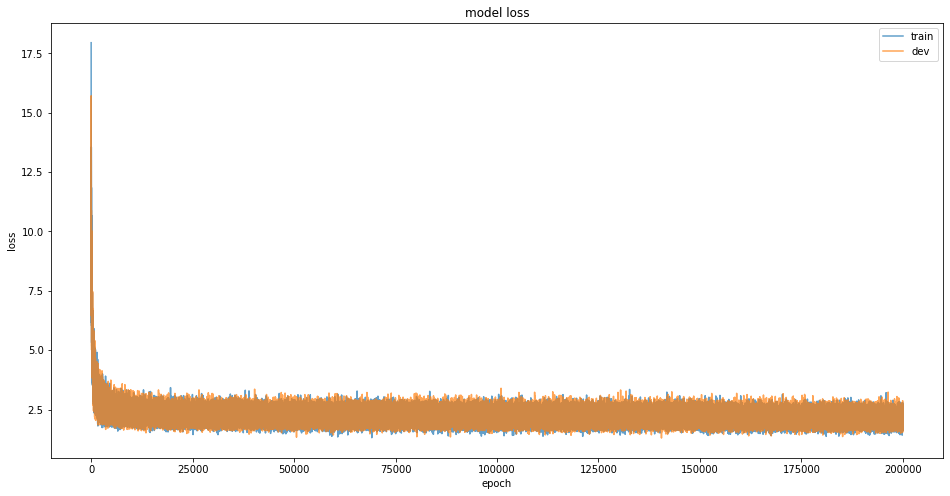

In [46]:
plt.figure(figsize = (16,8))

plt.plot(lossi, alpha=0.7)
plt.plot(lossi_dev, alpha=0.7)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')

In [47]:
with torch.no_grad():
    emb = C[Xtest]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ytest)
loss

tensor(2.1754)

Exercises:
- E01: Tune the hyperparameters of the training to beat my best validation loss of 2.2.


Since my best validation loss is 1.87, I guess exercise 1 is fulfilled. However, the model looks like it is
underfitting because the dev loss and training loss are very close at the end. But this needs to be reviewed more on accuracy if the accuracies are high.

- E02: I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? 


In order to make the probabilities at initialization were perfectly uniform is either by making the weight to be zero or increasing the logit-value to be a very high number. 

In [48]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 64), generator=g)* 0
W1 = torch.randn((3*64, 128), generator=g) * 0
b1 = torch.randn(128, generator=g) * 0
W2 = torch.randn((128, 27), generator=g)* 0
b2 = torch.randn(27, generator=g)* 0
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [49]:
#becareful that in production does not run the randint to get the training index for performance reason.
lri = []
lossi = []
lossi_dev = []
stepi = []
for i in range(20000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass

    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 3*64) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    #loss = F.cross_entropy(logits, Ytr[ix]) + 1*(C**2).mean() + 1*(W1**2).mean() + 1*(W2**2).mean()).mean()
    loss = F.cross_entropy(logits, Ytr[ix])

    with torch.no_grad():
        # dev forward part
        ix_dev = torch.randint(0, Xdev.shape[0], (32,))
        emb_dev = C[Xdev[ix_dev]] # (32, 3, 2)
        h_dev = torch.tanh(emb_dev.view(-1, 3*64) @ W1 + b1) # (32, 100)
        logits_dev = h_dev @ W2 + b2 # (32, 27)
        loss_dev = F.cross_entropy(logits_dev, Ydev[ix_dev])
        lossi_dev.append(loss_dev.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 10**-1
    if(i>=15000): lr = 10**-2
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.item())
    if(i==0):
        print(logits[-1])
        print(f'Tthe loss I\'d get if the predicted probabilities at initialization were perfectly uniform is {loss.item()}.')
print(lossi[-1], lossi_dev[-1])


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.], grad_fn=<SelectBackward0>)
Tthe loss I'd get if the predicted probabilities at initialization were perfectly uniform is 3.295837163925171.
2.8181307315826416 2.6191186904907227


In [50]:
with torch.no_grad():
    emb = C[Xtr]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ytr)
print(loss)

with torch.no_grad():
    emb = C[Xdev]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.8227)


tensor(2.8209)

In [51]:
#Increasing the logit-value to be a very high number
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 64), generator=g)
W1 = torch.randn((3*64, 128), generator=g)
b1 = torch.randn(128, generator=g)
W2 = torch.randn((128, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

lri = []
lossi = []
lossi_dev = []
stepi = []
for i in range(20000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass

    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 3*64) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    logits += 999
    #loss = F.cross_entropy(logits, Ytr[ix]) + 1*(C**2).mean() + 1*(W1**2).mean() + 1*(W2**2).mean()
    loss = F.cross_entropy(logits, Ytr[ix])

    with torch.no_grad():
        # dev forward part
        ix_dev = torch.randint(0, Xdev.shape[0], (32,))
        emb_dev = C[Xdev[ix_dev]] # (32, 3, 2)
        h_dev = torch.tanh(emb_dev.view(-1, 3*64) @ W1 + b1) # (32, 100)
        logits_dev = h_dev @ W2 + b2 # (32, 27)
        loss_dev = F.cross_entropy(logits_dev, Ydev[ix_dev])
        lossi_dev.append(loss_dev.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 10**-1
    if(i>=15000): lr = 10**-2
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.item())
    if(i==0):
        print(f'Tthe loss I\'d get if the predicted probabilities at initialization were perfectly uniform is {loss.item()}.')
print(lossi[-1], lossi_dev[-1])


Tthe loss I'd get if the predicted probabilities at initialization were perfectly uniform is 22.3605899810791.
2.4189820289611816 2.6354455947875977


Exercises 2:
- E02: I was not careful with the intialization of the network in this video. (1) What is the loss you'd get if the predicted probabilities at initialization were perfectly uniform? What loss do we achieve? (2) Can you tune the initialization to get a starting loss that is much more similar to (1)?

The loss was 3.30 at initialization by initiating the weight to be zero, and resulted dev loss in 2.82.
The loss was 16.2 at initialization by increasing the the logits to be a very large value, and resulted dev loss in 2.27.


In [52]:
with torch.no_grad():
    emb = C[Xtr]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2321)

In [53]:
with torch.no_grad():
    emb = C[Xdev]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2797)

In [54]:
with torch.no_grad():
    emb = C[Xtest]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ytest)
loss

tensor(2.2848)

part 2

In [55]:
n_embd, block_size = 64, 3
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, n_embd), generator=g)
W1 = torch.randn((3*n_embd, 128), generator=g) * (5/3) / ((n_embd * block_size))
b1 = torch.randn(128, generator=g) * 0.01
W2 = torch.randn((128, 27), generator=g)* 0.01
b2 = torch.randn(27, generator=g)*  0
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True
#becareful that in production does not run the randint to get the training index for performance reason.
lri = []
lossi = []
lossi_dev = []
stepi = []
for i in range(20000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass

    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 3*64) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix]) + 0.01*(C**2).mean() + 0.01*(W1**2).mean() + 0.01*(W2**2).mean()
    # loss = F.cross_entropy(logits, Ytr[ix])

    with torch.no_grad():
        # dev forward part
        ix_dev = torch.randint(0, Xdev.shape[0], (32,))
        emb_dev = C[Xdev[ix_dev]] # (32, 3, 2)
        h_dev = torch.tanh(emb_dev.view(-1, 3*64) @ W1 + b1) # (32, 100)
        logits_dev = h_dev @ W2 + b2 # (32, 27)
        loss_dev = F.cross_entropy(logits_dev, Ydev[ix_dev])
        lossi_dev.append(loss_dev.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    lr = 10**-1
    if(i>=15000): lr = 10**-2
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.item())
print(lossi[-1], lossi_dev[-1])



2.4287502765655518 2.1329421997070312


In [56]:
with torch.no_grad():
    emb = C[Xtr]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1089)

In [57]:
with torch.no_grad():
    emb = C[Xdev]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1369)

In [58]:
with torch.no_grad():
    emb = C[Xtest]
    h = torch.tanh(emb.view(-1, 3*64)@W1 + b1)
    logits = h @W2 + b2
    loss = F.cross_entropy(logits, Ytest)
loss

tensor(2.1361)

(2) Can you tune the initialization to get a starting loss that is much more similar to (1)?

I don't think I can because perfectly uniform means not learning. We can't really train a model with a trainable weight, and got a perfectly uniform prediction at the end, unless the model is not working.

- E03: Read the Bengio et al 2003 paper (link above), implement and try any idea from the paper. Did it work?
I used the fan in method for tanh. But it is still not getting closer to loss of 1.